In [4]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet_v2 import ResNet152V2, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg19 import VGG19

In [3]:
!pip install scipy

In [5]:
!pip install opendatasets

In [6]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/asheniranga/leaf-disease-dataset-combination')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  naklinaam


Your Kaggle Key:

  ································


100%|██████████| 761M/761M [00:32<00:00, 24.4MB/s] 


In [10]:
IMAGE_SIZE = [224, 224]

In [11]:
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80134624/80134624 [==============================] - 3s 0us/step


In [12]:
for layer in vgg19.layers:
    layer.trainable = False

In [13]:
folders = glob('/kaggle/working/leaf-disease-dataset-combination/image data/train/*')

In [14]:
x = Flatten()(vgg19.output)

In [15]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg19.input, outputs=prediction)

In [16]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [17]:

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [19]:
training_set = train_datagen.flow_from_directory('/kaggle/working/leaf-disease-dataset-combination/image data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 50,
                                                 class_mode = 'categorical')

Found 38104 images belonging to 13 classes.


In [20]:
test_set = test_datagen.flow_from_directory('/kaggle/working/leaf-disease-dataset-combination/image data/test',
                                            target_size = (224, 224),
                                            batch_size = 50,
                                            class_mode = 'categorical')

Found 5741 images belonging to 13 classes.


In [22]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/tmp/ipykernel_32/675562961.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
763/763 [==============================] - 527s 679ms/step - loss: 0.3249 - accuracy: 0.9023 - val_loss: 0.1364 - val_accuracy: 0.9531
Epoch 2/5
763/763 [==============================] - 519s 680ms/step - loss: 0.1516 - accuracy: 0.9517 - val_loss: 0.0831 - val_accuracy: 0.9740
Epoch 3/5
763/763 [==============================] - 506s 663ms/step - loss: 0.1306 - accuracy: 0.9598 - val_loss: 0.0998 - val_accuracy: 0.9702
Epoch 4/5
763/763 [==============================] - 507s 665ms/step - loss: 0.1334 - accuracy: 0.9612 - val_loss: 0.0467 - val_accuracy: 0.9843
Epoch 5/5
763/763 [==============================] - 512s 671ms/step - loss: 0.1054 - accuracy: 0.9684 - val_loss: 0.0447 - val_accuracy: 0.9852


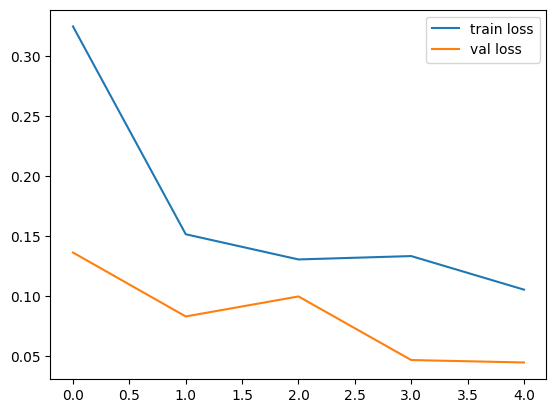

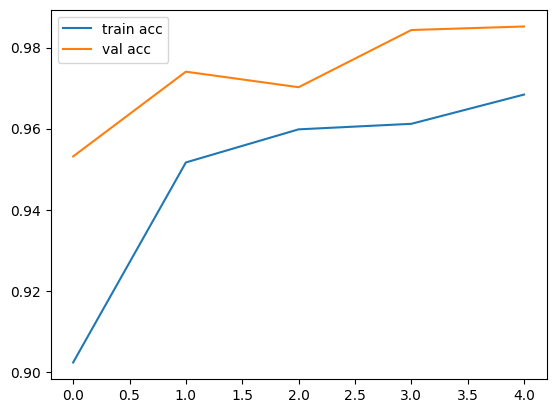

<Figure size 640x480 with 0 Axes>

In [23]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()

plt.show()
plt.savefig('LossVal_loss')
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [24]:
from tensorflow.keras.models import load_model

model.save('/kaggle/working/vgg19model.h5')